In [ ]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('investment.csv')
print(df)


    Year      K($) L (people)    $BGFCF  GFCF ($)  \
0   2000  2,59E+12  38,826147  2,59E+01  2,59E+10   
1   2001  2,62E+12  40,543786  2,90E+01  2,90E+10   
2   2002  2,65E+12  41,128744  3,29E+01  3,29E+10   
3   2003  2,69E+12  41,765881  3,72E+01  3,72E+10   
4   2004  2,73E+12  42,519336  4,04E+01  4,04E+10   
5   2005  2,77E+12   43,52065  4,29E+01  4,29E+10   
6   2006  2,82E+12  44,786203  4,70E+01  4,70E+10   
7   2007  2,88E+12   46,29896  5,73E+01  5,73E+10   
8   2008  2,93E+12  47,896567  5,69E+01  5,69E+10   
9   2009  2,99E+12  49,267257  5,75E+01  5,75E+10   
10  2010  3,06E+12  50,302354  6,43E+01  6,43E+10   
11  2011  3,11E+12  51,197726  5,06E+01  5,06E+10   
12  2012  3,15E+12  51,916391  4,82E+01  4,82E+10   
13  2013  3,20E+12  53,209344  4,97E+01  4,97E+10   
14  2014  3,26E+12  53,885546  5,33E+01  5,33E+10   
15  2015  3,32E+12  54,628714  5,90E+01  5,90E+10   
16  2016  3,38E+12  54,888312  6,04E+01  6,04E+10   
17  2017  3,44E+12  55,533898  6,49E+01  6,49E

In [ ]:
# Replace commas with periods and convert to float
df['K($)'] = df['K($)'].str.replace(',', '.').astype(float)
df['$BFDI'] = df['$BFDI'].str.replace(',', '.').astype(float)
df['RGDP'] = df['RGDP'].str.replace(',', '.').astype(float)
df['L (people)'] = df['L (people)'].str.replace(',', '.').astype(float)
df['$BGFCF'] = df['$BGFCF'].str.replace(',', '.').astype(float)
df['GFCF ($)'] = df['GFCF ($)'].str.replace(',', '.').astype(float)
df['Formulation of fixed capital (i) %'] = df['Formulation of fixed capital (i) %'].str.replace(',', '.').astype(float)
df['C'] = df['C'].str.replace(',', '.').astype(float)
df['FDI (% of GDP)'] = df['FDI (% of GDP)'].str.replace(',', '.').astype(float)
df['Real interest rate'] = df['Real interest rate'].str.replace(',', '.').astype(float)

# Display the dataframe to check the changes
print(df)


    Year          K($)  L (people)  $BGFCF      GFCF ($)  \
0   2000  2.590000e+12   38.826147    25.9  2.590000e+10   
1   2001  2.620000e+12   40.543786    29.0  2.900000e+10   
2   2002  2.650000e+12   41.128744    32.9  3.290000e+10   
3   2003  2.690000e+12   41.765881    37.2  3.720000e+10   
4   2004  2.730000e+12   42.519336    40.4  4.040000e+10   
5   2005  2.770000e+12   43.520650    42.9  4.290000e+10   
6   2006  2.820000e+12   44.786203    47.0  4.700000e+10   
7   2007  2.880000e+12   46.298960    57.3  5.730000e+10   
8   2008  2.930000e+12   47.896567    56.9  5.690000e+10   
9   2009  2.990000e+12   49.267257    57.5  5.750000e+10   
10  2010  3.060000e+12   50.302354    64.3  6.430000e+10   
11  2011  3.110000e+12   51.197726    50.6  5.060000e+10   
12  2012  3.150000e+12   51.916391    48.2  4.820000e+10   
13  2013  3.200000e+12   53.209344    49.7  4.970000e+10   
14  2014  3.260000e+12   53.885546    53.3  5.330000e+10   
15  2015  3.320000e+12   54.628714    59

In [ ]:
print(df.columns)

Index(['Year', 'K($)', 'L (people)', '$BGFCF', 'GFCF ($)',
       'Formulation of fixed capital (i) %', 'RGDP', 'C', '$BFDI',
       'FDI (% of GDP)', 'Real interest rate'],
      dtype='object')


In [ ]:
df.head()

,Year,K($),L (people),$BGFCF,GFCF ($),Formulation of fixed capital (i) %,RGDP,C,$BFDI,FDI (% of GDP),Real interest rate
0,2000,2.590000e+12,38.826147,25.9,2.590000e+10,27.65,9.350000e+10,3.266957e+10,3.89,4.16,6.91
1,2001,2.620000e+12,40.543786,29.0,2.900000e+10,29.15,9.930000e+10,3.413040e+10,3.95,3.98,6.62
2,2002,2.650000e+12,41.128744,32.9,3.290000e+10,31.14,1.060000e+11,3.673383e+10,4.22,3.99,4.17
3,2003,2.690000e+12,41.765881,37.2,3.720000e+10,32.97,1.130000e+11,3.967646e+10,4.14,3.67,2.21
4,2004,2.730000e+12,42.519336,40.4,4.040000e+10,33.26,1.210000e+11,4.250000e+10,4.30,3.54,1.19


In [ ]:
df.describe()

,Year,K($),L (people),$BGFCF,GFCF ($),Formulation of fixed capital (i) %,RGDP,C,$BFDI,FDI (% of GDP),Real interest rate
count,24.000000,2.400000e+01,24.000000,24.000000,2.400000e+01,24.000000,2.400000e+01,2.400000e+01,24.000000,24.0000,24.000000
mean,2011.500000,3.174167e+12,49.925916,61.170833,6.117083e+10,29.689583,2.102000e+11,7.415459e+10,10.113333,4.8375,2.270000
std,7.071068,4.307013e+11,6.008877,25.298298,2.529830e+10,4.562323,8.793075e+10,3.051701e+10,4.483083,1.5458,6.175798
min,2000.000000,2.590000e+12,38.826147,25.900000,2.590000e+10,23.650000,9.350000e+10,3.266957e+10,3.890000,3.3900,-20.500000
25%,2005.750000,2.807500e+12,44.469815,45.975000,4.597500e+10,24.545000,1.377500e+11,4.815000e+10,4.895000,3.9875,2.010000
50%,2011.500000,3.130000e+12,51.557058,57.100000,5.710000e+10,30.320000,1.940000e+11,6.905000e+10,10.720000,4.3050,3.920000
75%,2017.250000,3.457500e+12,55.179310,66.175000,6.617500e+10,33.042500,2.780000e+11,9.990000e+10,14.325000,4.9475,5.392500
max,2023.000000,4.030000e+12,56.799003,114.000000,1.140000e+11,38.270000,3.770000e+11,1.280000e+11,16.200000,9.6600,8.990000


In [ ]:
print("Number of records")
print(df.count())
print("\nData types")
print(df.dtypes)
print("Shape:")
df.shape[0], df.shape[1]

Number of records
Year                                  24
K($)                                  24
L (people)                            24
$BGFCF                                24
GFCF ($)                              24
Formulation of fixed capital (i) %    24
RGDP                                  24
C                                     24
$BFDI                                 24
FDI (% of GDP)                        24
Real interest rate                    24
dtype: int64

Data types
Year                                    int64
K($)                                  float64
L (people)                            float64
$BGFCF                                float64
GFCF ($)                              float64
Formulation of fixed capital (i) %    float64
RGDP                                  float64
C                                     float64
$BFDI                                 float64
FDI (% of GDP)                        float64
Real interest rate                    float64


(24, 11)

In [ ]:
#Adjust some of the columns

  # Divide the capital & GDP data by 1 billion
df['K($)'] = df['K($)'] / 1000000000
df['RGDP'] = df['RGDP'] / 1000000000
df['C'] = df['C'] / 1000000000


  # Change the names of the columns
df.rename(columns={'K($)': 'K($bil.)'}, inplace=True)
df.rename(columns={'L (people)': 'L (mil. people)'}, inplace=True)
df.rename(columns={'$BGFCF': 'GFCF ($bil.)'}, inplace=True)
df.rename(columns={'RGDP': 'RGDP ($bil.)'}, inplace=True)
df.rename(columns={'$BFDI': 'FDI ($bil.)'}, inplace=True)
df.rename(columns={'C': 'C ($bil.)'}, inplace=True)
df.rename(columns={'Real interest rate': 'r(%)'}, inplace=True)




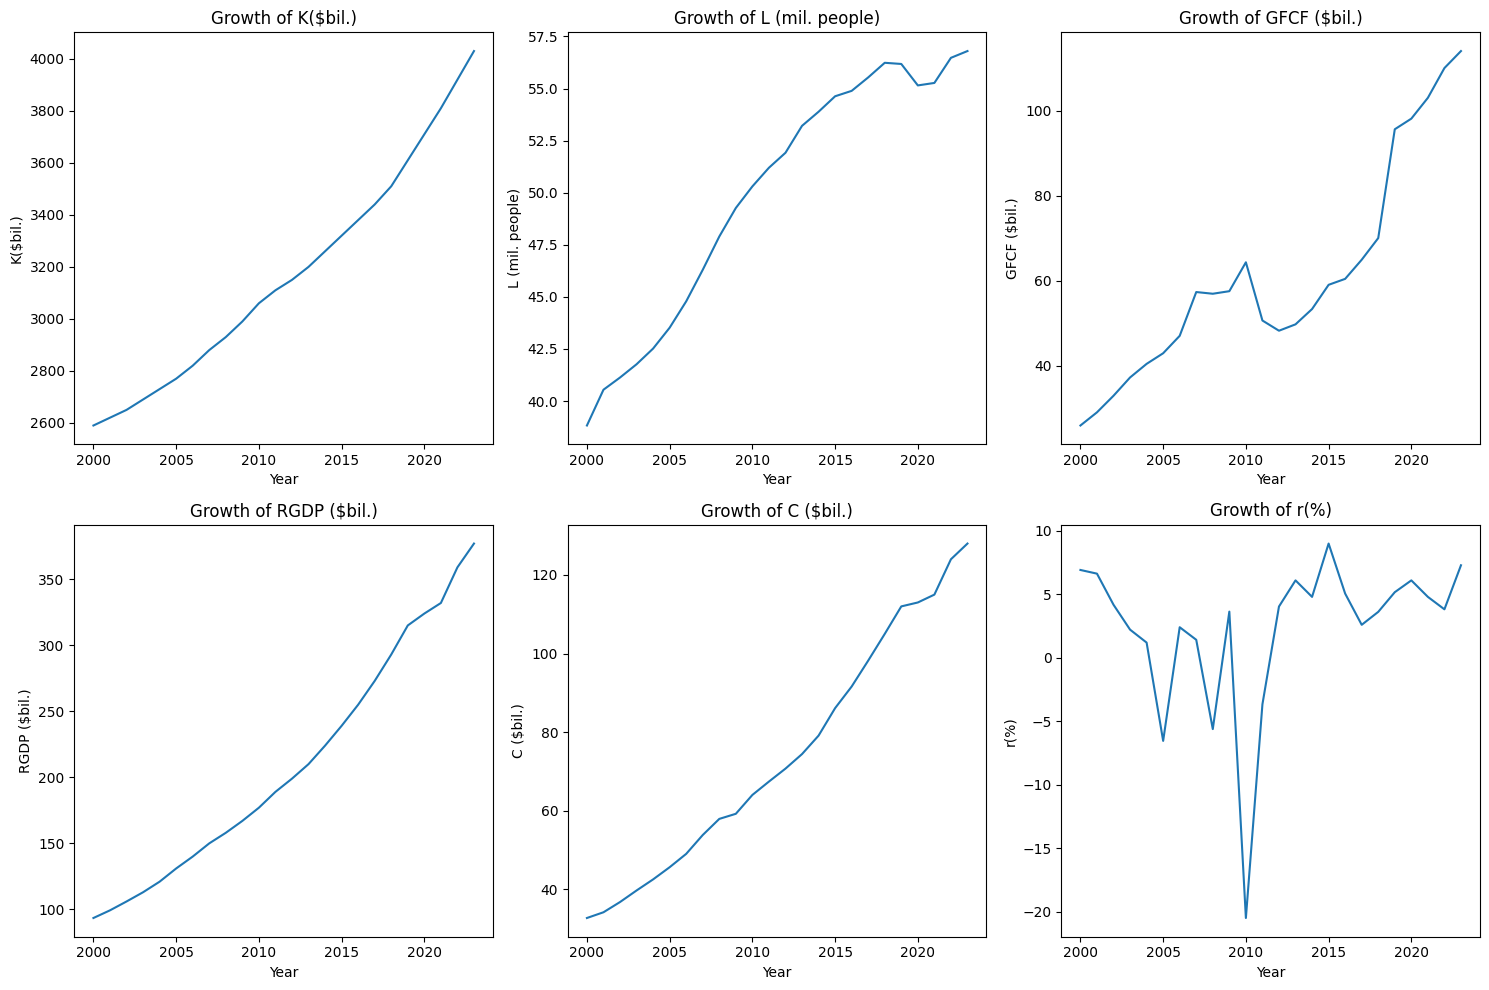

In [ ]:
import matplotlib.pyplot as plt


columns = ['K($bil.)', 'L (mil. people)', 'GFCF ($bil.)', 'RGDP ($bil.)', 'C ($bil.)', 'r(%)']

# Check if 'Year' column exists in the dataframe
if 'Year' in df.columns:
    x_data = df['Year']  # Use the 'Year' column as x-axis data
else:
    x_data = df.index

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns of subplots
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through each column and plot the respective data
for i, column in enumerate(columns):
    axes[i].plot(x_data, df[column])  # Plot with 'Year' on the x-axis
    axes[i].set_title(f'Growth of {column}')  # Set the title for each subplot
    axes[i].set_xlabel('Year')  # Set the x-label to 'Year'
    axes[i].set_ylabel(column)  # Set the y-label to the column name

# Adjust the layout for better spacing
plt.tight_layout()
plt.savefig('all_growth.png')
plt.show()


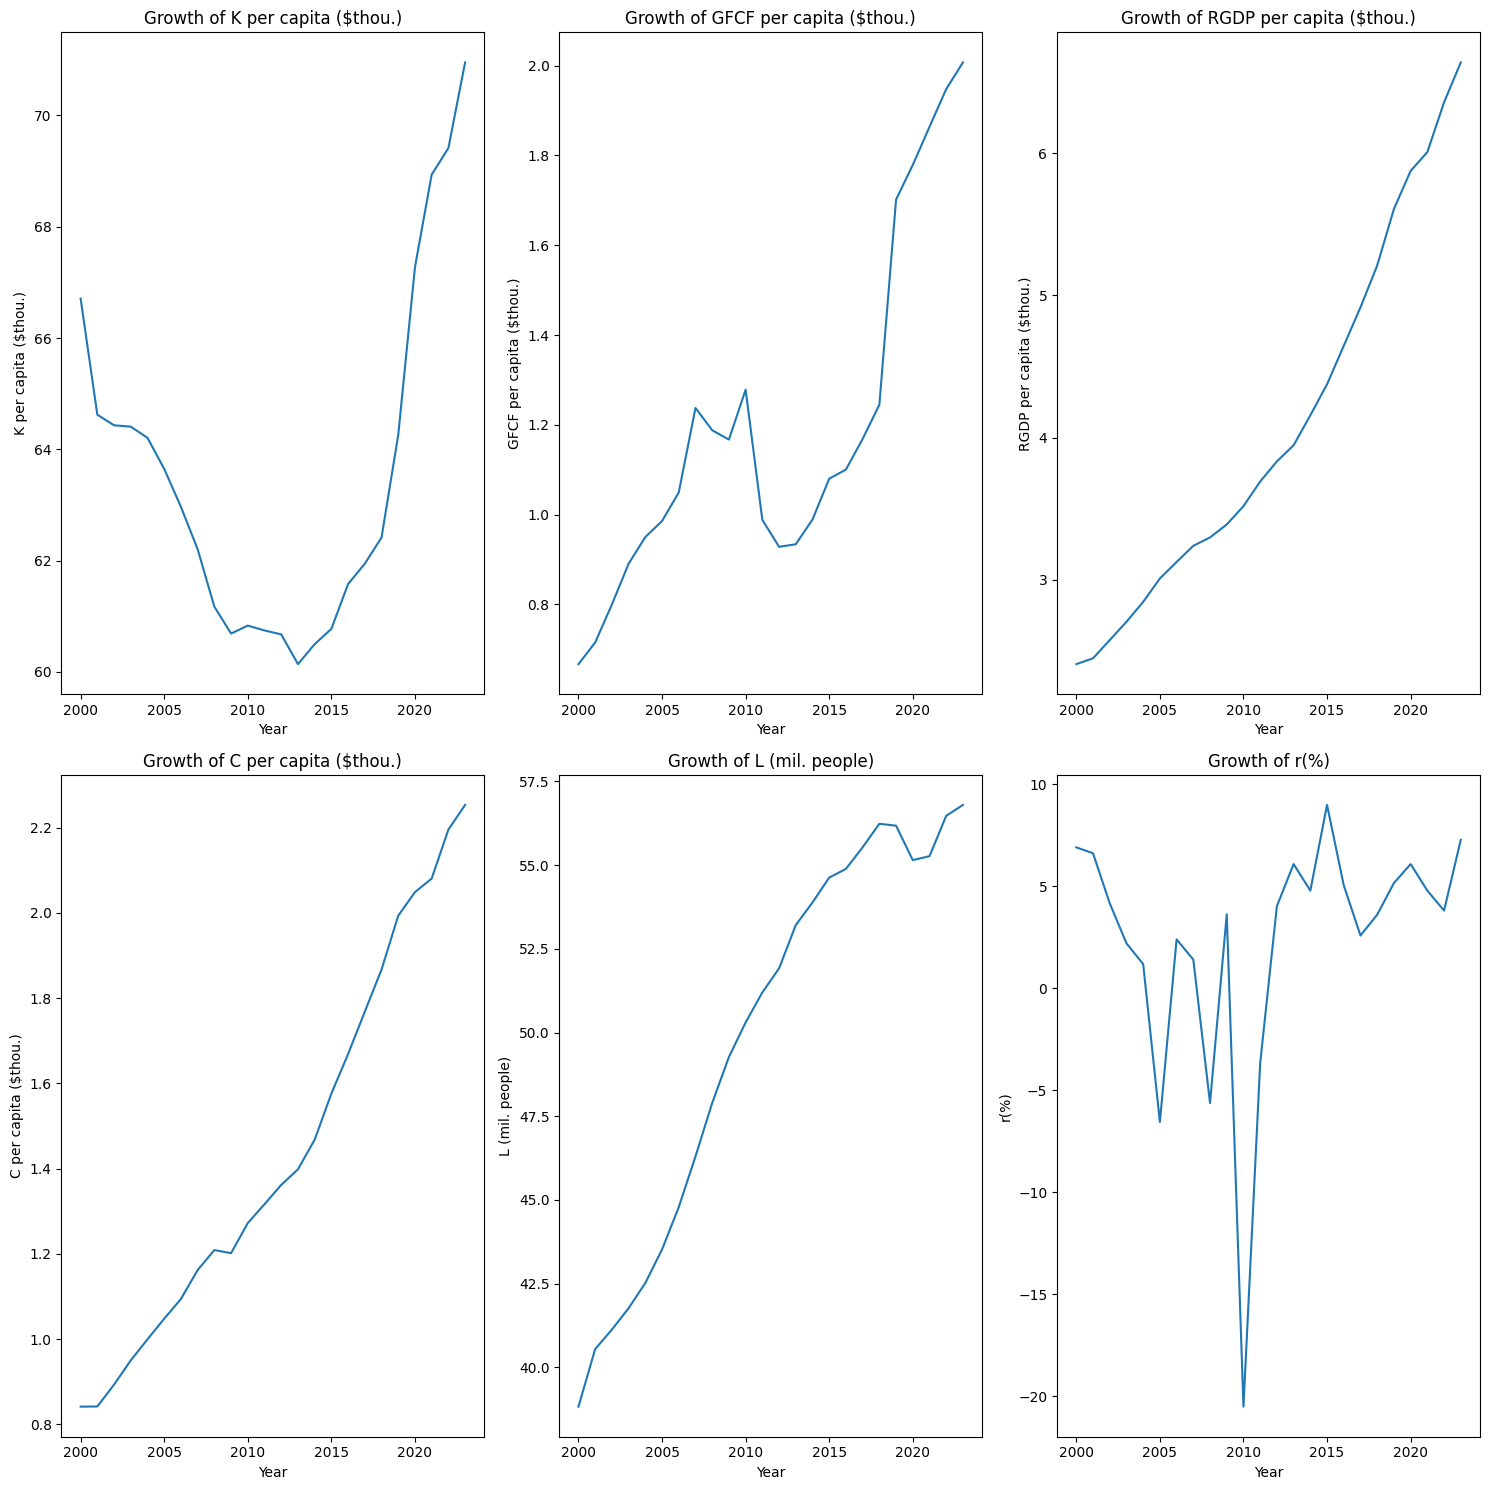

In [ ]:
# Assuming df has the columns: 'K($bil.)', 'GFCF ($bil.)', 'RGDP ($bil.)', 'C ($bil.)', 'L (mil. people)', 'Real interest rate'
columns2 = ['K($bil.)', 'GFCF ($bil.)', 'RGDP ($bil.)', 'C ($bil.)']

# Create new per capita columns in thousands
per_capita_columns = [
    'K per capita ($thou.)',
    'GFCF per capita ($thou.)',
    'RGDP per capita ($thou.)',
    'C per capita ($thou.)'
]
# Create per capita data by dividing each of the columns by 'L (mil. people)'
for col, new_col in zip(columns2, per_capita_columns):
    df[new_col] = df[col] / df['L (mil. people)']

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten to make indexing easier

# Plot the new per capita variables along with 'L (mil. people)' and 'Real interest rate'
plot_data = per_capita_columns + ['L (mil. people)', 'r(%)']

for i, column in enumerate(plot_data):
    axes[i].plot(df['Year'], df[column])  # Plot each variable against 'Year'
    axes[i].set_title(f'Growth of {column}')  # Set the title for each subplot
    axes[i].set_xlabel('Year')  # Set the x-label to 'Year'
    axes[i].set_ylabel(column)  # Set the y-label to the column name

# Adjust layout to prevent overlapping subplots
plt.tight_layout()
plt.savefig('all_capita_growth.png')
plt.show()


In [ ]:
df['r(%)'].describe()

,r(%)
count,24.000000
mean,2.270000
std,6.175798
min,-20.500000
25%,2.010000
50%,3.920000
75%,5.392500
max,8.990000


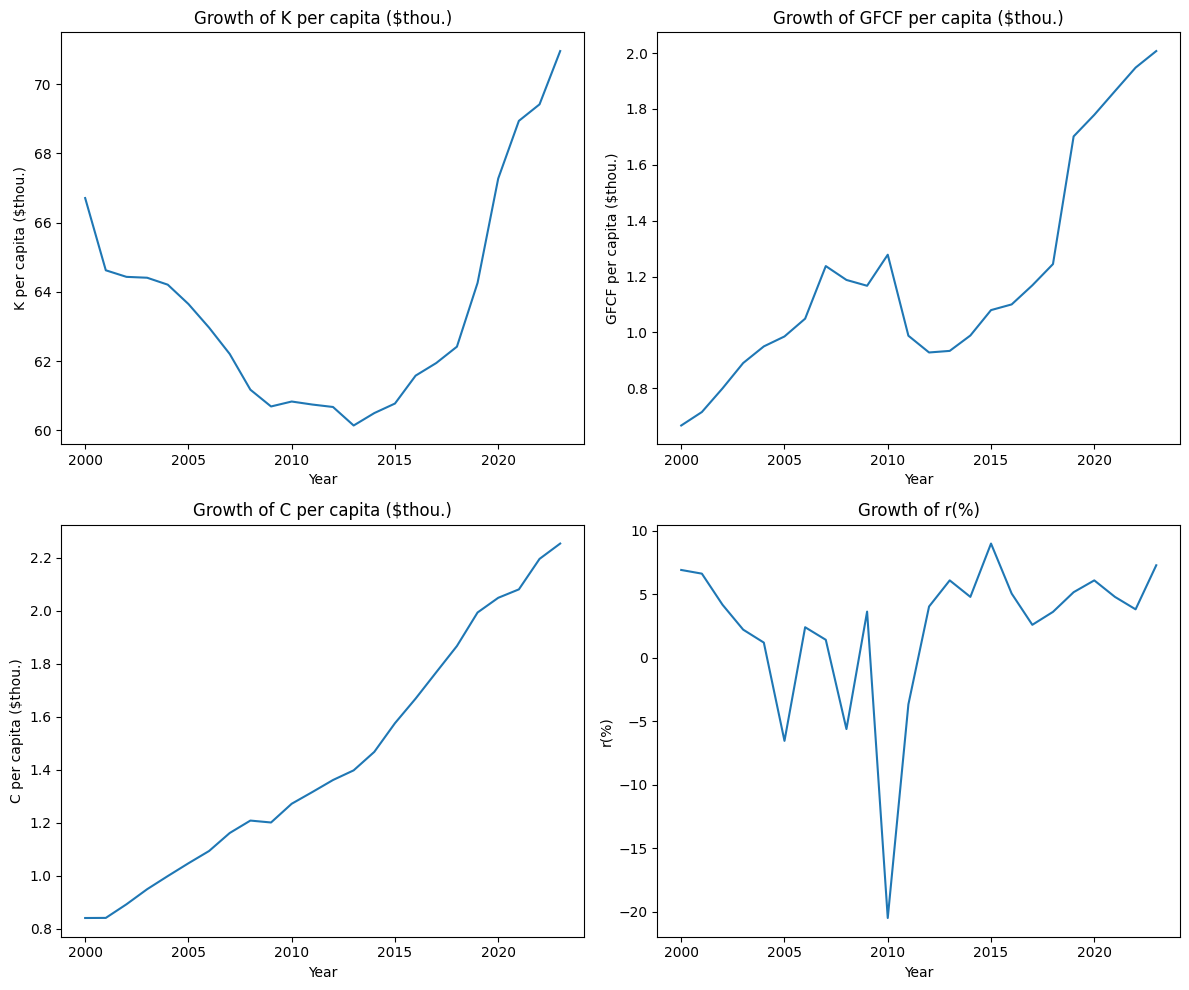

In [ ]:
plot_columns2 = [
    'K per capita ($thou.)',
    'GFCF per capita ($thou.)',
    'C per capita ($thou.)',
    'r(%)'
]

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten for easy indexing

# Plot each column over time
for i, column in enumerate(plot_columns2):
    axes[i].plot(df['Year'], df[column])
    axes[i].set_title(f'Growth of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.savefig('intr_capita_growth.png')
plt.show()

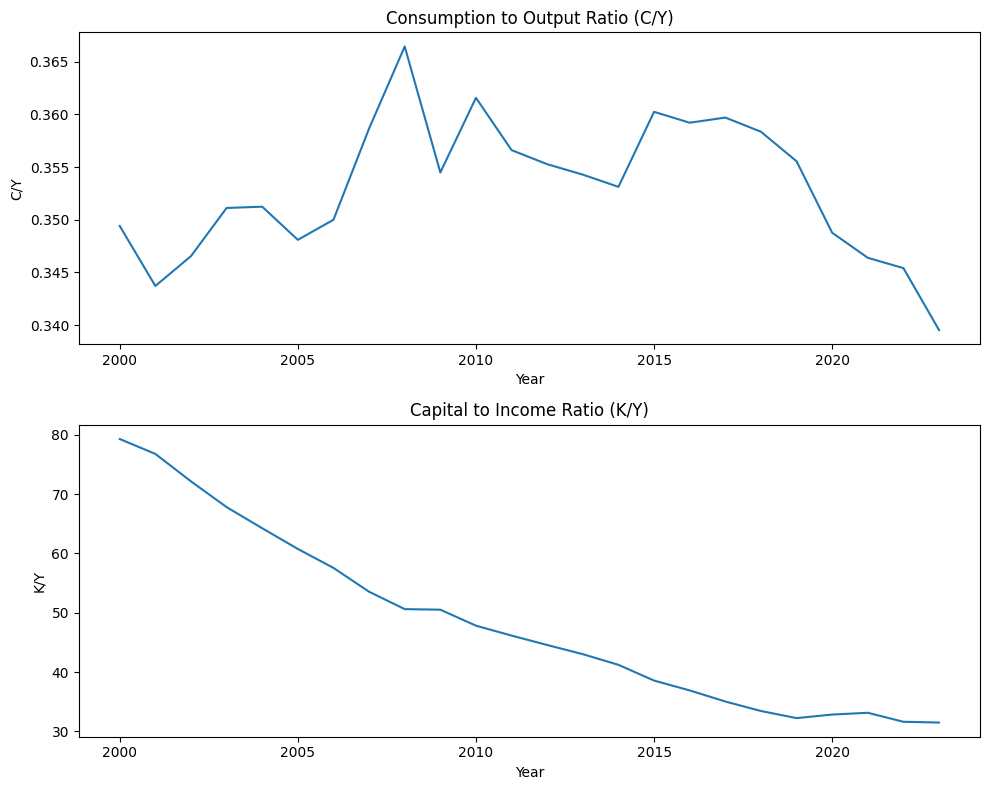

In [ ]:
# Compute Consumption to Output ratio (C/Y)
df['C/Y'] = df['C per capita ($thou.)'] / df['RGDP per capita ($thou.)']

# Compute Capital to Income ratio (K/Y)
df['K/Y'] = df['K per capita ($thou.)'] / df['C per capita ($thou.)']

import matplotlib.pyplot as plt

# Create a subplot for the two ratios
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot Consumption to Output ratio
axes[0].plot(df['Year'], df['C/Y'])
axes[0].set_title('Consumption to Output Ratio (C/Y)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('C/Y')

# Plot Capital to Income ratio
axes[1].plot(df['Year'], df['K/Y'])
axes[1].set_title('Capital to Income Ratio (K/Y)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('K/Y')

plt.tight_layout()
plt.show()

In [ ]:
df[['C per capita ($thou.)', 'RGDP per capita ($thou.)', 'GFCF per capita ($thou.)', 'K per capita ($thou.)' , 'r(%)']].describe()

,C per capita ($thou.),RGDP per capita ($thou.),GFCF per capita ($thou.),K per capita ($thou.),r(%)
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.437916,4.076148,1.194251,63.562035,2.270000
std,0.449358,1.300473,0.385184,3.103235,6.175798
min,0.841432,2.408171,0.667076,60.139813,-20.500000
25%,1.082510,3.096988,0.946129,60.817582,2.010000
50%,1.339135,3.762328,1.090217,62.690758,3.920000
75%,1.793001,4.989487,1.253136,64.479241,5.392500
max,2.253561,6.637440,2.007077,70.951950,8.990000


In [ ]:
df[['K/Y','C/Y']].describe()

,K/Y,C/Y
count,24.000000,24.000000
mean,48.379201,0.353074
std,15.120158,0.006467
min,31.484375,0.339523
25%,34.630055,0.348597
50%,45.348444,0.353705
75%,58.349669,0.358438
max,79.278671,0.366456
